In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from keras import layers
from keras.models import Model

In [7]:
data = pd.read_csv("ner_dataset.csv", encoding="latin1")

In [8]:
data.head(50)
data = data.fillna(method="ffill")
data.head(50)


,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O
5,Sentence: 1,through,IN,O
6,Sentence: 1,London,NNP,B-geo
7,Sentence: 1,to,TO,O
8,Sentence: 1,protest,VB,O
9,Sentence: 1,the,DT,O


In [9]:

print("Unique words in corpus:", data['Word'].nunique())
print("Unique tags in corpus:", data['Tag'].nunique())

Unique words in corpus: 13134
Unique tags in corpus: 17


In [10]:

words=list(data['Word'].unique())
words.append("ENDPAD")
tags=list(data['Tag'].unique())

In [11]:

print("Unique tags are:", tags)

Unique tags are: ['O', 'B-geo', 'B-gpe', 'B-per', 'I-geo', 'B-org', 'I-org', 'B-tim', 'B-art', 'I-art', 'I-per', 'I-gpe', 'I-tim', 'B-nat', 'B-eve', 'I-eve', 'I-nat']


In [12]:
num_words = len(words)
num_tags = len(tags)


In [13]:

num_words

13135

In [14]:
class SentenceGetter(object):
    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, p, t) for w, p, t in zip(s["Word"].values.tolist(),
                                                           s["POS"].values.tolist(),
                                                           s["Tag"].values.tolist())]
        self.grouped = self.data.groupby("Sentence #").apply(agg_func)
        self.sentences = [s for s in self.grouped]

    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

In [15]:

getter = SentenceGetter(data)
sentences = getter.sentences


In [16]:
len(sentences)

6612

In [17]:
sentences[0]

[('Thousands', 'NNS', 'O'),
 ('of', 'IN', 'O'),
 ('demonstrators', 'NNS', 'O'),
 ('have', 'VBP', 'O'),
 ('marched', 'VBN', 'O'),
 ('through', 'IN', 'O'),
 ('London', 'NNP', 'B-geo'),
 ('to', 'TO', 'O'),
 ('protest', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('war', 'NN', 'O'),
 ('in', 'IN', 'O'),
 ('Iraq', 'NNP', 'B-geo'),
 ('and', 'CC', 'O'),
 ('demand', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('withdrawal', 'NN', 'O'),
 ('of', 'IN', 'O'),
 ('British', 'JJ', 'B-gpe'),
 ('troops', 'NNS', 'O'),
 ('from', 'IN', 'O'),
 ('that', 'DT', 'O'),
 ('country', 'NN', 'O'),
 ('.', '.', 'O')]

In [18]:
word2idx = {w: i + 1 for i, w in enumerate(words)}
tag2idx = {t: i for i, t in enumerate(tags)}

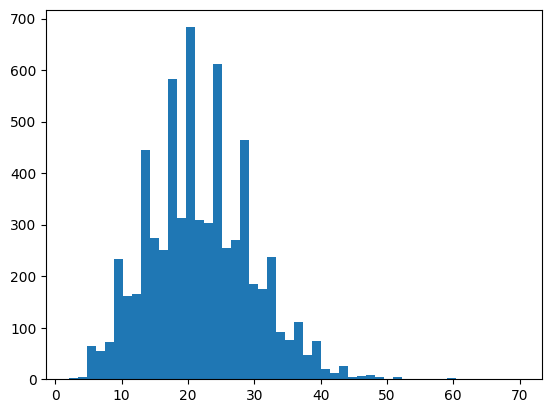

In [19]:
word2idx


plt.hist([len(s) for s in sentences], bins=50)
plt.show()


X1 = [[word2idx[w[0]] for w in s] for s in sentences]


type(X1[0])


X1[0]


max_len = 50


In [20]:
X = sequence.pad_sequences(maxlen=max_len,
                  sequences=X1, padding="post",
                  value=num_words-1)

In [21]:

X[0]

array([    1,     2,     3,     4,     5,     6,     7,     8,     9,
          10,    11,    12,    13,    14,    15,    10,    16,     2,
          17,    18,    19,    20,    21,    22, 13134, 13134, 13134,
       13134, 13134, 13134, 13134, 13134, 13134, 13134, 13134, 13134,
       13134, 13134, 13134, 13134, 13134, 13134, 13134, 13134, 13134,
       13134, 13134, 13134, 13134, 13134], dtype=int32)

In [22]:
y1 = [[tag2idx[w[2]] for w in s] for s in sentences]

In [23]:
y = sequence.pad_sequences(maxlen=max_len,
                  sequences=y1,
                  padding="post",
                  value=tag2idx["O"])


In [24]:

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=1)

In [25]:

X_train[0]


array([   62,   150,   306,   569,   348,   150,  7706,    14,   348,
         972,   294,   349,     4,   242,    25,    12,   987,    32,
         194,    12,   989,   479,    22, 13134, 13134, 13134, 13134,
       13134, 13134, 13134, 13134, 13134, 13134, 13134, 13134, 13134,
       13134, 13134, 13134, 13134, 13134, 13134, 13134, 13134, 13134,
       13134, 13134, 13134, 13134, 13134], dtype=int32)

In [26]:

y_train[0]

array([0, 1, 0, 0, 0, 5, 6, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

In [27]:
input_word = layers.Input(shape=(max_len,))
embedding_layer=layers.Embedding(input_dim=num_words,output_dim=50,input_length=max_len)(input_word)
dropout_layer=layers.SpatialDropout1D(0.1)(embedding_layer)
bidirectional_lstm=layers.Bidirectional(
    layers.LSTM(units=100,return_sequences=True,
                recurrent_dropout=0.1))(dropout_layer)
output=layers.TimeDistributed(
      layers.Dense(num_tags,activation="softmax"))(bidirectional_lstm)
model = Model(input_word, output)

In [28]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50)]              0         
                                                                 
 embedding (Embedding)       (None, 50, 50)            656750    
                                                                 
 spatial_dropout1d (Spatial  (None, 50, 50)            0         
 Dropout1D)                                                      
                                                                 
 bidirectional (Bidirection  (None, 50, 200)           120800    
 al)                                                             
                                                                 
 time_distributed (TimeDist  (None, 50, 17)            3417      
 ributed)                                                        
                                                             

In [29]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [30]:
history = model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test,y_test),
    batch_size=32,
    epochs=3,
)

Epoch 1/3
166/166 [==============================] - 23s 109ms/step - loss: 0.4968 - accuracy: 0.9269 - val_loss: 0.2807 - val_accuracy: 0.9346
Epoch 2/3
166/166 [==============================] - 19s 117ms/step - loss: 0.2152 - accuracy: 0.9397 - val_loss: 0.1716 - val_accuracy: 0.9491
Epoch 3/3
166/166 [==============================] - 18s 107ms/step - loss: 0.1464 - accuracy: 0.9535 - val_loss: 0.1393 - val_accuracy: 0.9592


1/1 [==============================] - 1s 970ms/step
Word           True 	 Pred

------------------------------
It             O	O
is             O	O
expected       O	O
to             O	O
cost           O	O
$              O	O
1              O	O
trillion       O	O
over           O	O
10             O	O
years          O	O
.              O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose      

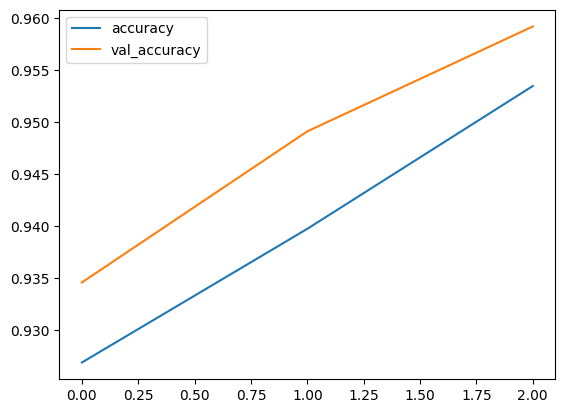

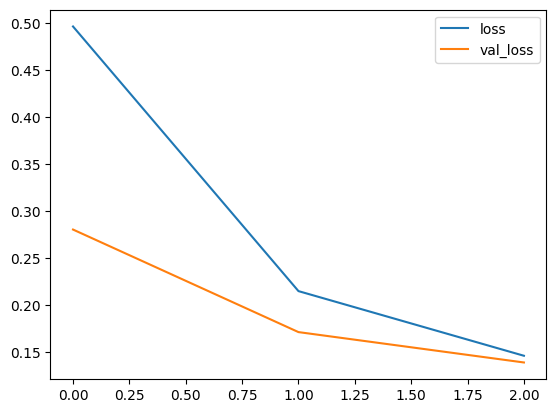

In [31]:

metrics = pd.DataFrame(model.history.history)
metrics.head()


metrics[['accuracy','val_accuracy']].plot()


metrics[['loss','val_loss']].plot()


i = 20
p = model.predict(np.array([X_test[i]]))
p = np.argmax(p, axis=-1)
y_true = y_test[i]
print("{:15}{:5}\t {}\n".format("Word", "True", "Pred"))
print("-" *30)
for w, true, pred in zip(X_test[i], y_true, p[0]):
    print("{:15}{}\t{}".format(words[w-1], tags[true], tags[pred]))